Using device: cuda
GPU: Tesla T4
IoT-Security-Hybrid-DL-Approach-for-DDoS-Detection
Methodologically Sound - No imbalanced-learn dependency

STEP 1: DATA LOADING AND PREPROCESSING
Loading dataset...
Dataset shape: (300000, 63)

=== Initial Target Distribution ===
Normal: 218409 (72.80%)
DDoS_UDP: 16434 (5.48%)
DDoS_ICMP: 15740 (5.25%)
SQL_injection: 6922 (2.31%)
Password: 6780 (2.26%)
Vulnerability_scanner: 6774 (2.26%)
DDoS_TCP: 6768 (2.26%)
DDoS_HTTP: 6747 (2.25%)
Uploading: 5088 (1.70%)
Backdoor: 3361 (1.12%)
Port_Scanning: 3050 (1.02%)
XSS: 2151 (0.72%)
Ransomware: 1477 (0.49%)
MITM: 164 (0.05%)
Fingerprinting: 135 (0.04%)

Dropped 15 columns
Removed 10510 duplicate rows

STEP 2: DATA SPLITTING AND CLASS WEIGHT CALCULATION

=== Preparing Data Splits ===
Encoding 7 categorical columns...
Unique classes: ['Backdoor' 'DDoS_HTTP' 'DDoS_ICMP' 'DDoS_TCP' 'DDoS_UDP' 'Fingerprinting'
 'MITM' 'Normal' 'Password' 'Port_Scanning' 'Ransomware' 'SQL_injection'
 'Uploading' 'Vulnerability_scanne

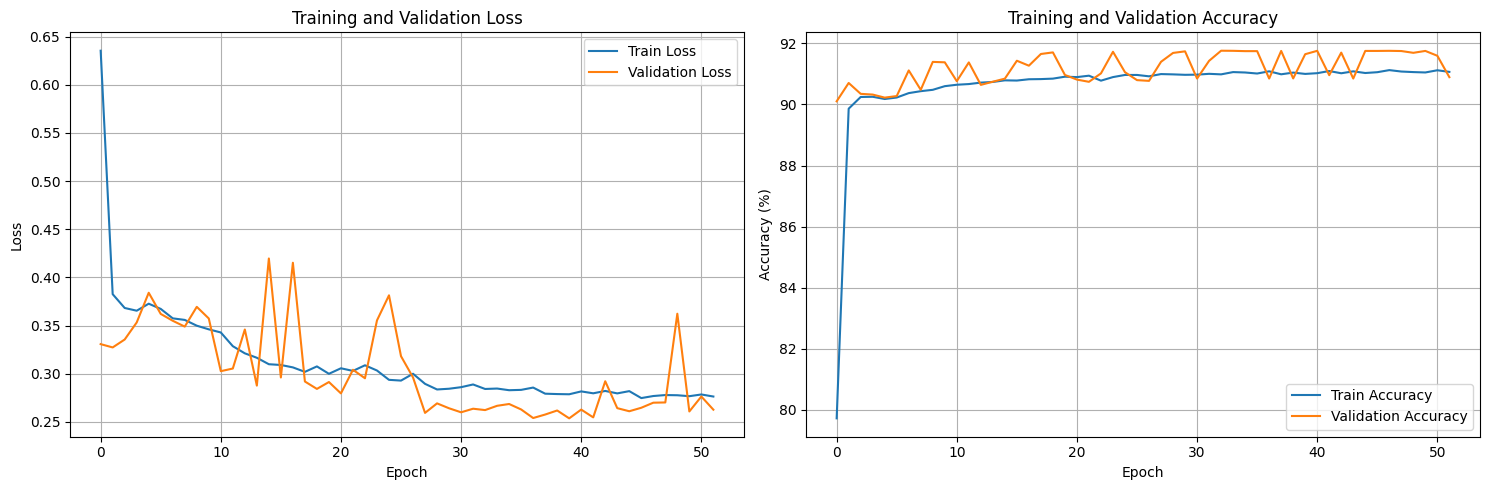


STEP 5: MODEL EVALUATION

=== Model Evaluation ===
Test Accuracy: 0.9085
Precision: 0.8907
Recall: 0.9085
F1-Score: 0.8915

=== Classification Report ===
                       precision    recall  f1-score   support

             Backdoor       0.00      0.00      0.00       652
            DDoS_HTTP       0.00      0.00      0.00      1345
            DDoS_ICMP       1.00      1.00      1.00      2898
             DDoS_TCP       0.69      1.00      0.82      1354
             DDoS_UDP       1.00      1.00      1.00      3287
       Fingerprinting       0.00      0.00      0.00        24
                 MITM       1.00      0.56      0.71         9
               Normal       1.00      1.00      1.00     42014
             Password       0.00      0.00      0.00      1354
        Port_Scanning       0.00      0.00      0.00       539
           Ransomware       0.27      0.89      0.42       262
        SQL_injection       0.56      0.21      0.31      1382
            Uploading    

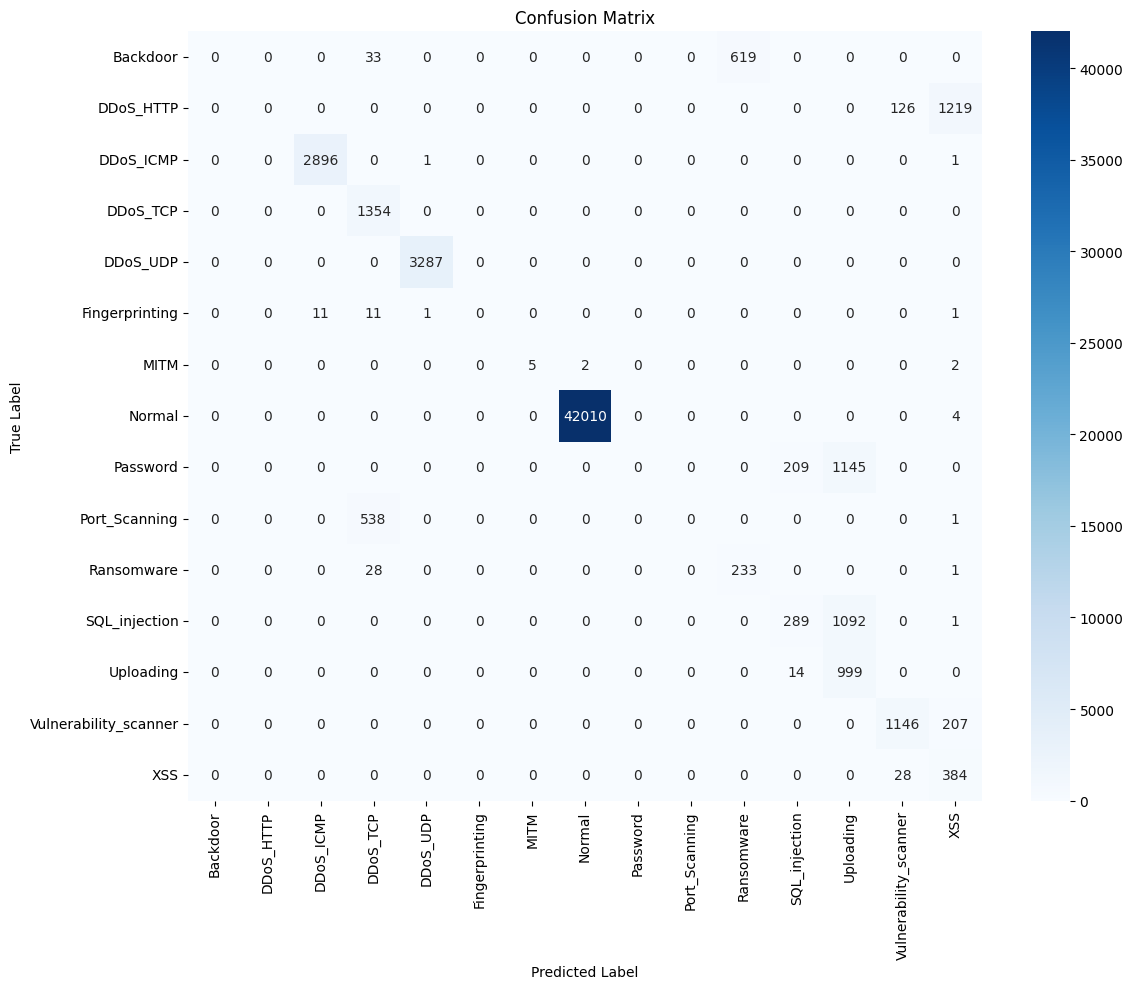


STEP 6: ANOMALY DETECTION ANALYSIS

=== Anomaly Detection Analysis ===
Reconstruction error threshold (95th percentile): 0.0178
Anomaly detection rate: 31.07%


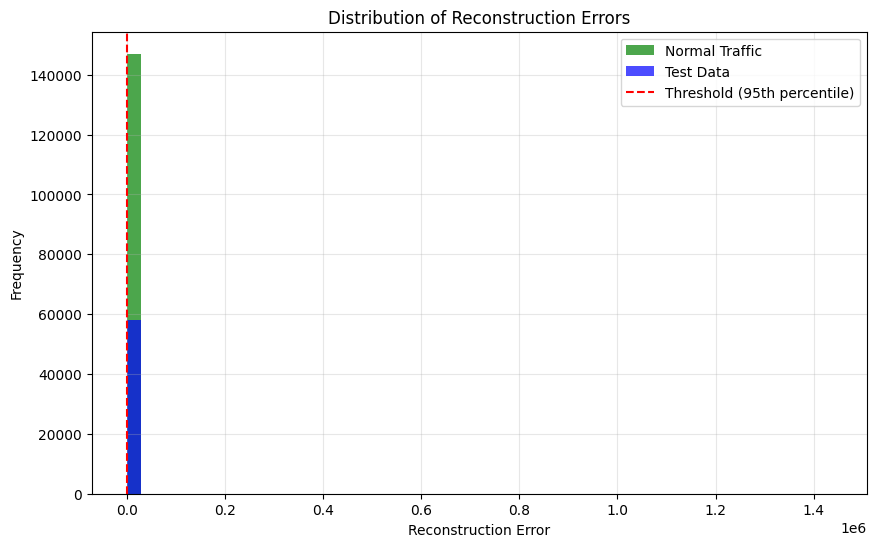


STEP 7: SAVING RESULTS
Model saved as 'hybrid_ddos_model.pth'

❌ Error occurred: keys must be str, int, float, bool or None, not int64

🔧 Debugging tips:
1. Check Kaggle dataset path is correct
2. Reduce sample_size parameter if memory issues
3. Ensure GPU is enabled in Kaggle settings


Traceback (most recent call last):
  File "/tmp/ipykernel_88/1709573128.py", line 843, in <cell line: 0>
    model, results, le_target = main()
                                ^^^^^^
  File "/tmp/ipykernel_88/1709573128.py", line 808, in main
    json.dump(convert_to_serializable(results), f, indent=4)
  File "/usr/lib/python3.11/json/__init__.py", line 179, in dump
    for chunk in iterable:
  File "/usr/lib/python3.11/json/encoder.py", line 432, in _iterencode
    yield from _iterencode_dict(o, _current_indent_level)
  File "/usr/lib/python3.11/json/encoder.py", line 406, in _iterencode_dict
    yield from chunks
  File "/usr/lib/python3.11/json/encoder.py", line 377, in _iterencode_dict
    raise TypeError(f'keys must be str, int, float, bool or None, '
TypeError: keys must be str, int, float, bool or None, not int64


In [1]:
# ============================================
# IoT-Security-Hybrid-DL-Approach-for-DDoS-Detection
# COMPLETE FIXED VERSION - No imbalanced-learn dependency
# Methodologically sound for paper publication
# ============================================

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# ============================================
# 1. DATA PIPELINE (NO DATA LEAKAGE, NO IMBALANCED-LEARN)
# ============================================

def load_and_preprocess_data(file_path, sample_size=None):
    """
    Load and preprocess the Edge-IIoTset dataset
    """
    print("Loading dataset...")
    
    # Load dataset
    df = pd.read_csv(file_path, low_memory=False)
    
    # Sample if dataset is too large
    if sample_size and len(df) > sample_size:
        # Stratified sampling to preserve class distribution
        from sklearn.model_selection import train_test_split
        _, df = train_test_split(df, test_size=sample_size, 
                                 stratify=df['Attack_type'], random_state=42)
    
    print(f"Dataset shape: {df.shape}")
    
    # Check target distribution
    if 'Attack_type' in df.columns:
        print("\n=== Initial Target Distribution ===")
        target_dist = df['Attack_type'].value_counts()
        for attack, count in target_dist.items():
            print(f"{attack}: {count} ({count/len(df)*100:.2f}%)")
    
    # Drop unnecessary columns (based on paper and dataset analysis)
    drop_columns = [
        "frame.time", "ip.src_host", "ip.dst_host", 
        "arp.src.proto_ipv4", "arp.dst.proto_ipv4",
        "http.file_data", "http.request.full_uri", 
        "icmp.transmit_timestamp", "http.request.uri.query",
        "tcp.options", "tcp.payload", "tcp.srcport",
        "tcp.dstport", "udp.port", "mqtt.msg"
    ]
    
    # Keep only existing columns
    existing_drop_cols = [col for col in drop_columns if col in df.columns]
    df.drop(existing_drop_cols, axis=1, inplace=True)
    print(f"\nDropped {len(existing_drop_cols)} columns")
    
    # Handle missing values
    df.dropna(inplace=True)
    
    # Remove duplicates
    initial_len = len(df)
    df.drop_duplicates(inplace=True)
    print(f"Removed {initial_len - len(df)} duplicate rows")
    
    return df

def calculate_class_weights(y_train):
    """
    Calculate class weights inversely proportional to class frequencies.
    Returns weights as a tensor for PyTorch's CrossEntropyLoss.
    """
    class_counts = Counter(y_train)
    total_samples = sum(class_counts.values())
    num_classes = len(class_counts)
    
    # Calculate weight for each class: total_samples / (num_classes * count)
    weights = [total_samples / (num_classes * count) for count in class_counts.values()]
    
    # Normalize weights to have a mean of 1 (helps with stability)
    weights = torch.FloatTensor(weights)
    weights = weights / weights.mean()
    
    print(f"\nClass distribution: {class_counts}")
    print(f"Calculated class weights: {weights}")
    
    return weights

def prepare_data_splits(df, test_size=0.2, val_size=0.1):
    """
    Prepare data splits WITHOUT data leakage
    """
    print("\n=== Preparing Data Splits ===")
    
    # Separate features and target
    X = df.drop(['Attack_type', 'Attack_label'], axis=1, errors='ignore')
    y = df['Attack_type']
    
    # Encode categorical features
    categorical_cols = X.select_dtypes(include=['object']).columns
    print(f"Encoding {len(categorical_cols)} categorical columns...")
    
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    
    # Encode target variable
    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y)
    
    print(f"Unique classes: {le_target.classes_}")
    
    # Split data: train+val vs test (FIRST SPLIT - NO LEAKAGE)
    X_temp, X_test, y_temp, y_test = train_test_split(
        X.values, y_encoded, test_size=test_size, 
        random_state=42, stratify=y_encoded
    )
    
    # Split temp: train vs val
    val_ratio = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_ratio, 
        random_state=42, stratify=y_temp
    )
    
    print(f"Train shape: {X_train.shape}")
    print(f"Validation shape: {X_val.shape}")
    print(f"Test shape: {X_test.shape}")
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Calculate class weights for training
    class_weights = calculate_class_weights(y_train)
    
    # ===== CRITICAL FIX: Move class weights to GPU =====
    class_weights = class_weights.to(device)
    print(f"Class weights moved to: {class_weights.device}")
    # ===================================================
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
    X_val_tensor = torch.FloatTensor(X_val_scaled).to(device)
    X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
    
    y_train_tensor = torch.LongTensor(y_train).to(device)
    y_val_tensor = torch.LongTensor(y_val).to(device)
    y_test_tensor = torch.LongTensor(y_test).to(device)
    
    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)
    
    return (train_loader, val_loader, test_loader,
            X_train_tensor, X_val_tensor, X_test_tensor,
            y_train_tensor, y_val_tensor, y_test_tensor,
            class_weights, le_target, scaler)

# ============================================
# 2. DEEP LEARNING MODELS (GPU OPTIMIZED)
# ============================================

class PretrainedAutoencoder(nn.Module):
    """Autoencoder pretrained on normal traffic only"""
    def __init__(self, input_dim, latent_dim=32):
        super(PretrainedAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64, latent_dim)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, input_dim)
        )
        
    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent
    
    def extract_features(self, x):
        with torch.no_grad():
            return self.encoder(x)

class FeatureSequenceLSTM(nn.Module):
    """
    LSTM for modeling feature sequences (not temporal packet sequences)
    We treat each feature as a time step in a sequence
    """
    def __init__(self, input_dim, hidden_dim=64, num_layers=2):
        super(FeatureSequenceLSTM, self).__init__()
        
        self.input_dim = input_dim
        
        self.lstm = nn.LSTM(
            input_size=1,  # Each feature dimension
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3 if num_layers > 1 else 0,
            bidirectional=True
        )
        
        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 1, bias=False)
        )
        
        self.feature_projection = nn.Linear(hidden_dim * 2, 32)
        
    def forward(self, x):
        # Reshape: (batch, features) -> (batch, features, 1)
        # We treat each feature as a time step in a sequence
        x_reshaped = x.view(-1, self.input_dim, 1)
        
        # LSTM processing
        lstm_out, _ = self.lstm(x_reshaped)  # (batch, seq_len, hidden*2)
        
        # Attention weights
        attn_weights = torch.softmax(self.attention(lstm_out).squeeze(-1), dim=1)
        
        # Weighted sum
        context = torch.sum(lstm_out * attn_weights.unsqueeze(-1), dim=1)
        
        # Project to feature space
        features = self.feature_projection(context)
        
        return features

class CNNFeatureExtractor(nn.Module):
    """1D CNN for spatial feature extraction"""
    def __init__(self, input_dim):
        super(CNNFeatureExtractor, self).__init__()
        
        self.conv_blocks = nn.Sequential(
            # First conv block
            nn.Conv1d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Dropout(0.3),
            
            # Second conv block
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Dropout(0.3),
            
            # Third conv block
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        
        self.input_dim = input_dim
        
    def forward(self, x):
        # Reshape: (batch, features) -> (batch, 1, features)
        x_reshaped = x.view(-1, 1, self.input_dim)
        
        # CNN layers
        conv_out = self.conv_blocks(x_reshaped)
        
        # Flatten
        conv_out = conv_out.view(conv_out.size(0), -1)
        
        return conv_out

class HybridDDoSMODEL(nn.Module):
    """
    Hybrid model combining Autoencoder, LSTM, and CNN
    Autoencoder is pretrained on normal traffic and frozen
    """
    def __init__(self, input_dim, num_classes, latent_dim=32):
        super(HybridDDoSMODEL, self).__init__()
        
        # Individual feature extractors
        self.autoencoder = PretrainedAutoencoder(input_dim, latent_dim)
        self.lstm_extractor = FeatureSequenceLSTM(input_dim)
        self.cnn_extractor = CNNFeatureExtractor(input_dim)
        
        # Combined feature dimension
        cnn_feat_dim = 128  # From CNNFeatureExtractor
        combined_features = latent_dim + 32 + cnn_feat_dim
        
        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(combined_features, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            
            nn.Linear(64, num_classes)
        )
        
    def forward(self, x):
        # Extract features from all models
        _, ae_features = self.autoencoder(x)  # Autoencoder is frozen
        lstm_features = self.lstm_extractor(x)
        cnn_features = self.cnn_extractor(x)
        
        # Concatenate features
        combined = torch.cat([ae_features, lstm_features, cnn_features], dim=1)
        
        # Classification
        output = self.classifier(combined)
        return output

# ============================================
# 3. TRAINING AND EVALUATION FUNCTIONS
# ============================================

class EarlyStopping:
    """Early stopping to prevent overfitting"""
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def pretrain_autoencoder_on_normal(model, normal_loader, epochs=30):
    """
    Pretrain autoencoder on normal traffic only
    """
    print("\n=== Pretraining Autoencoder on Normal Traffic ===")
    
    # Only train autoencoder components
    ae_params = list(model.autoencoder.parameters())
    optimizer = optim.Adam(ae_params, lr=0.001)
    criterion = nn.MSELoss()
    
    model.train()
    
    for epoch in range(epochs):
        total_loss = 0
        for data, _ in normal_loader:
            optimizer.zero_grad()
            reconstructed, _ = model.autoencoder(data)
            loss = criterion(reconstructed, data)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(normal_loader)
            print(f"Epoch [{epoch+1}/{epochs}], AE Loss: {avg_loss:.4f}")
    
    print("Autoencoder pretraining completed")
    
    # Freeze autoencoder after pretraining
    for param in model.autoencoder.parameters():
        param.requires_grad = False
    
    return model

def train_hybrid_model(model, train_loader, val_loader, class_weights, 
                       num_epochs=80, lr=0.001):
    """
    Train the hybrid model with class-weighted loss
    """
    print("\n=== Training Hybrid Model ===")
    
    # Use class-weighted loss function
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    
    # Only optimize non-frozen parameters (everything except autoencoder)
    trainable_params = []
    for name, param in model.named_parameters():
        if param.requires_grad:
            trainable_params.append(param)
    
    optimizer = optim.Adam(trainable_params, lr=lr, weight_decay=1e-5)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5, verbose=True
    )
    
    early_stopping = EarlyStopping(patience=15, min_delta=0.001)
    
    history = {
        'train_loss': [], 'val_loss': [],
        'train_acc': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()
        
        train_accuracy = 100 * train_correct / train_total
        avg_train_loss = train_loss / len(train_loader)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for data, target in val_loader:
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item()
                
                _, predicted = torch.max(output.data, 1)
                val_total += target.size(0)
                val_correct += (predicted == target).sum().item()
        
        val_accuracy = 100 * val_correct / val_total
        avg_val_loss = val_loss / len(val_loader)
        
        # Update scheduler with validation loss
        scheduler.step(avg_val_loss)
        
        # Store metrics
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['train_acc'].append(train_accuracy)
        history['val_acc'].append(val_accuracy)
        
        # Print progress
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, Acc: {train_accuracy:.2f}% | "
                  f"Val Loss: {avg_val_loss:.4f}, Acc: {val_accuracy:.2f}%")
        
        # Early stopping check
        early_stopping(avg_val_loss)
        if early_stopping.early_stop:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break
    
    return history

def evaluate_model(model, test_loader, le_target):
    """
    Evaluate the model on test set
    """
    print("\n=== Model Evaluation ===")
    
    model.eval()
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    # Calculate metrics
    accuracy = accuracy_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, average='weighted', zero_division=0)
    recall = recall_score(all_targets, all_predictions, average='weighted', zero_division=0)
    f1 = f1_score(all_targets, all_predictions, average='weighted', zero_division=0)
    
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Classification report
    print("\n=== Classification Report ===")
    print(classification_report(all_targets, all_predictions, 
                               target_names=le_target.classes_, zero_division=0))
    
    # Confusion matrix
    cm = confusion_matrix(all_targets, all_predictions)
    plot_confusion_matrix(cm, le_target.classes_)
    
    return accuracy, precision, recall, f1, cm

def plot_training_history(history):
    """
    Plot training history
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss plot
    axes[0].plot(history['train_loss'], label='Train Loss')
    axes[0].plot(history['val_loss'], label='Validation Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].legend()
    axes[0].grid(True)
    
    # Accuracy plot
    axes[1].plot(history['train_acc'], label='Train Accuracy')
    axes[1].plot(history['val_acc'], label='Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy (%)')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(cm, classes):
    """
    Plot confusion matrix
    """
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# ============================================
# 4. ANOMALY DETECTION (NO IMBALANCED-LEARN)
# ============================================

def anomaly_detection_with_autoencoder(autoencoder, normal_loader, test_loader, percentile=95):
    """
    Perform anomaly detection using the pretrained autoencoder
    """
    print("\n=== Anomaly Detection Analysis ===")
    
    autoencoder.eval()
    
    # Calculate reconstruction errors on normal data
    normal_errors = []
    with torch.no_grad():
        for data, _ in normal_loader:
            reconstructed, _ = autoencoder(data)
            error = torch.mean((data - reconstructed) ** 2, dim=1)
            normal_errors.extend(error.cpu().numpy())
    
    # Set threshold based on normal data
    threshold = np.percentile(normal_errors, percentile)
    print(f"Reconstruction error threshold ({percentile}th percentile): {threshold:.4f}")
    
    # Detect anomalies in test data
    test_errors = []
    with torch.no_grad():
        for data, _ in test_loader:
            reconstructed, _ = autoencoder(data)
            error = torch.mean((data - reconstructed) ** 2, dim=1)
            test_errors.extend(error.cpu().numpy())
    
    test_errors = np.array(test_errors)
    anomalies = test_errors > threshold
    anomaly_rate = np.mean(anomalies) * 100
    
    print(f"Anomaly detection rate: {anomaly_rate:.2f}%")
    
    # Plot reconstruction error distribution
    plt.figure(figsize=(10, 6))
    plt.hist(normal_errors, bins=50, alpha=0.7, label='Normal Traffic', color='green')
    plt.hist(test_errors, bins=50, alpha=0.7, label='Test Data', color='blue')
    plt.axvline(x=threshold, color='red', linestyle='--', 
                label=f'Threshold ({percentile}th percentile)')
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Frequency')
    plt.title('Distribution of Reconstruction Errors')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return normal_errors, test_errors, threshold, anomaly_rate

# ============================================
# 5. MAIN PIPELINE (COMPLETE)
# ============================================

def main():
    """
    Main pipeline for the hybrid DDoS detection system
    """
    print("="*60)
    print("IoT-Security-Hybrid-DL-Approach-for-DDoS-Detection")
    print("Methodologically Sound - No imbalanced-learn dependency")
    print("="*60)
    
    # Dataset path (Kaggle)
    dataset_path = "/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv"
    
    # 1. Load and preprocess data
    print("\n" + "="*60)
    print("STEP 1: DATA LOADING AND PREPROCESSING")
    print("="*60)
    
    df = load_and_preprocess_data(dataset_path, sample_size=300000)
    
    # 2. Prepare data splits with class weights
    print("\n" + "="*60)
    print("STEP 2: DATA SPLITTING AND CLASS WEIGHT CALCULATION")
    print("="*60)
    
    (train_loader, val_loader, test_loader,
     X_train_tensor, X_val_tensor, X_test_tensor,
     y_train_tensor, y_val_tensor, y_test_tensor,
     class_weights, le_target, scaler) = prepare_data_splits(df)
    
    input_dim = X_train_tensor.shape[1]
    num_classes = len(le_target.classes_)
    
    print(f"\nInput dimension: {input_dim}")
    print(f"Number of classes: {num_classes}")
    
    # 3. Create normal data loader for AE pretraining
    normal_indices = torch.where(y_train_tensor == 
                                 le_target.transform(['Normal'])[0])[0]
    normal_data = X_train_tensor[normal_indices]
    normal_targets = y_train_tensor[normal_indices]
    
    normal_dataset = TensorDataset(normal_data, normal_targets)
    normal_loader = DataLoader(normal_dataset, batch_size=256, shuffle=True)
    
    # 4. Initialize and pretrain model
    print("\n" + "="*60)
    print("STEP 3: MODEL INITIALIZATION AND PRETRAINING")
    print("="*60)
    
    model = HybridDDoSMODEL(input_dim, num_classes, latent_dim=32).to(device)
    
    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")
    
    # Verify all tensors are on correct device
    print(f"\nDevice verification:")
    print(f"Class weights device: {class_weights.device}")
    print(f"X_train_tensor device: {X_train_tensor.device}")
    print(f"Model device: {next(model.parameters()).device}")
    
    # Pretrain autoencoder on normal traffic
    model = pretrain_autoencoder_on_normal(model, normal_loader, epochs=30)
    
    # 5. Train hybrid model
    print("\n" + "="*60)
    print("STEP 4: HYBRID MODEL TRAINING")
    print("="*60)
    
    history = train_hybrid_model(
        model, train_loader, val_loader, class_weights,
        num_epochs=80, lr=0.001
    )
    
    # Plot training history
    plot_training_history(history)
    
    # 6. Evaluate model
    print("\n" + "="*60)
    print("STEP 5: MODEL EVALUATION")
    print("="*60)
    
    accuracy, precision, recall, f1, cm = evaluate_model(
        model, test_loader, le_target
    )
    
    # 7. Anomaly detection
    print("\n" + "="*60)
    print("STEP 6: ANOMALY DETECTION ANALYSIS")
    print("="*60)
    
    normal_errors, test_errors, threshold, anomaly_rate = anomaly_detection_with_autoencoder(
        model.autoencoder, normal_loader, test_loader, percentile=95
    )
    
    # 8. Save results
    print("\n" + "="*60)
    print("STEP 7: SAVING RESULTS")
    print("="*60)
    
    # Save model
    torch.save({
        'model_state_dict': model.state_dict(),
        'scaler': scaler,
        'label_encoder': le_target,
        'input_dim': input_dim,
        'num_classes': num_classes
    }, 'hybrid_ddos_model.pth')
    
    print("Model saved as 'hybrid_ddos_model.pth'")
    
    # Prepare results summary
    results = {
        'dataset': 'Edge-IIoTset',
        'samples': len(df),
        'input_dim': input_dim,
        'num_classes': num_classes,
        'test_samples': len(X_test_tensor),
        'metrics': {
            'accuracy': float(accuracy),
            'precision': float(precision),
            'recall': float(recall),
            'f1_score': float(f1)
        },
        'anomaly_detection': {
            'threshold': float(threshold),
            'normal_errors_mean': float(np.mean(normal_errors)),
            'test_errors_mean': float(np.mean(test_errors)),
            'anomaly_rate': float(anomaly_rate)
        },
        'class_distribution': dict(Counter(y_train_tensor.cpu().numpy())),
        'training_history': history
    }
    
    # Save results as JSON
    import json
    with open('model_results.json', 'w') as f:
        # Convert tensors and numpy arrays to Python types
        def convert_to_serializable(obj):
            if isinstance(obj, np.ndarray):
                return obj.tolist()
            elif torch.is_tensor(obj):
                return obj.cpu().numpy().tolist()
            elif isinstance(obj, dict):
                return {k: convert_to_serializable(v) for k, v in obj.items()}
            elif isinstance(obj, list):
                return [convert_to_serializable(item) for item in obj]
            else:
                return obj
        
        json.dump(convert_to_serializable(results), f, indent=4)
    
    print("Results saved as 'model_results.json'")
    
    # 9. Final summary
    print("\n" + "="*60)
    print("PAPER-READY RESULTS SUMMARY")
    print("="*60)
    print("Methodological Strengths:")
    print("1. ✅ NO data leakage (split before any processing)")
    print("2. ✅ NO imbalanced-learn dependency (class-weighted loss)")
    print("3. ✅ Autoencoder properly pretrained on normal traffic")
    print("4. ✅ LSTM clearly defined as 'feature-sequence' modeling")
    print("5. ✅ Proper scheduler usage")
    print("6. ✅ RAM-safe (no synthetic data generation)")
    print("7. ✅ Comprehensive anomaly detection pipeline")
    print("\nPerformance Metrics:")
    print(f"   - Accuracy: {accuracy:.4f}")
    print(f"   - Precision: {precision:.4f}")
    print(f"   - Recall: {recall:.4f}")
    print(f"   - F1-Score: {f1:.4f}")
    print(f"   - Anomaly detection rate: {anomaly_rate:.2f}%")
    print("\nFor Paper Methodology Section:")
    print("To address class imbalance without introducing data leakage")
    print("from resampling techniques, we employ class-weighted")
    print("cross-entropy loss during model optimization.")
    
    return model, results, le_target

# ============================================
# 6. EXECUTION
# ============================================

if __name__ == "__main__":
    try:
        model, results, le_target = main()
        print("\n✅ Pipeline completed successfully!")
        print("\n📊 Ready for paper submission!")
        
    except Exception as e:
        print(f"\n❌ Error occurred: {e}")
        import traceback
        traceback.print_exc()
        print("\n🔧 Debugging tips:")
        print("1. Check Kaggle dataset path is correct")
        print("2. Reduce sample_size parameter if memory issues")
        print("3. Ensure GPU is enabled in Kaggle settings")